# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [9]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [10]:
N = 10000
def caminata(C0, N):
    x = [C0]
    y = [C0]
    z = [C0]
    rnd = [-1,1]
    for i in range (N):
        x.append(x[-1]+random.choice(rnd)*(N**(1/2)))
        y.append(y[-1]+random.choice(rnd)*(N**(1/2)))
        z.append(z[-1]+random.choice(rnd)*(N**(1/2)))
    return x,y,z


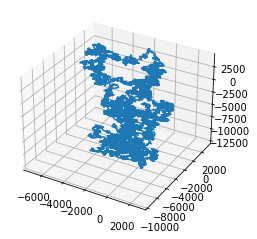

In [11]:
figura = plt.figure()
ax = figura.add_subplot(111, projection = "3d")
x,y,z = caminata(0,N)
ax.plot (x,y,z)


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [12]:
import numpy as np
import matplotlib.pyplot as plt 


In [13]:
def juego ():
    return np.random.randint(0,2,1)

In [14]:
def apuesta():
    j = juego()
    
    ganaste = 1 == j
    return ganaste 

In [15]:
def apostador (C0, n):
    C = [C0]
    for i in range (n):
        if C[-1] <= 0:
            return C
    for i in range (n):
        A = C[-1]/2 if C[-1] >= 6 else 2
        if (apuesta()):
            C.append(C[-1]+A)
        else:
            C.append(C[-1]-A)
    return C

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

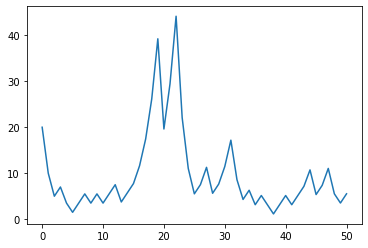

In [16]:
plt.plot(apostador(20,50))
plt.grid

In [23]:
promedio_quiebra = []
n = 1000
for i in range (n):
    promedio_quiebra.append(apostador (20,50))
np.mean(promedio_quiebra)

18.929581477618406

### profe no use 10,000 porque tardaba mucho en sacar los resultados y el histograma duro como 10 minutos corriendo y no lo mostraba

(array([[51.,  0.,  0., ...,  0.,  0.,  0.],
        [51.,  0.,  0., ...,  0.,  0.,  0.],
        [51.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [51.,  0.,  0., ...,  0.,  0.,  0.],
        [51.,  0.,  0., ...,  0.,  0.,  0.],
        [51.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-4.20937500e+01,  6.36103479e+03,  1.27641633e+04,  1.91672919e+04,
         2.55704204e+04,  3.19735490e+04,  3.83766775e+04,  4.47798060e+04,
         5.11829346e+04,  5.75860631e+04,  6.39891917e+04]),
 <a list of 1000 BarContainer objects>)

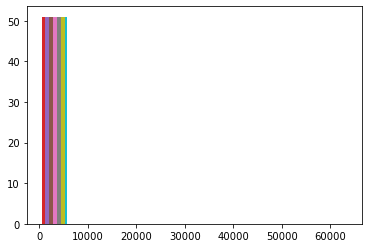

In [22]:
plt.hist(promedio_quiebra)